<a href="https://colab.research.google.com/github/DrewYounkin/6301_Project/blob/main/6301_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from sklearn import tree #sklearn tree model for decision trees
from sklearn.model_selection import train_test_split #for partitioning data
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import roc_auc_score # asses tree performance
from sklearn.metrics import accuracy_score

#upload local files
import io
from google.colab import files

import numpy as np  #math calculations
import pandas as pd  #dataframe handling

from matplotlib import pyplot as plt #plotting

import seaborn as sns #plotting

seed = 1234

In [7]:
uploaded = files.upload()#upload file from your computer


Saving credit_line_increase (1).csv to credit_line_increase (1).csv


In [8]:
type(uploaded) #type of object created

dict

In [9]:
uploaded.keys()#what is stored in the file

dict_keys(['credit_line_increase (1).csv'])

In [11]:
#Read data into Pandas Dataframe
data =pd.read_csv(io.StringIO(uploaded['credit_line_increase (1).csv'].decode('utf-8')))

In [15]:
#Number of rows and columns
data.shape

(30000, 26)

In [14]:
#Name of columns in dataset
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [17]:
#Check for missing data values
data.isnull().any()

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [20]:
#Descriptive Statistics
data.describe()

,ID,LIMIT_BAL,SEX,RACE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DELINQ_NEXT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,2.721967,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,1.094397,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,2.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,3.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,4.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2a03ed2f10>,
      dtype=object)

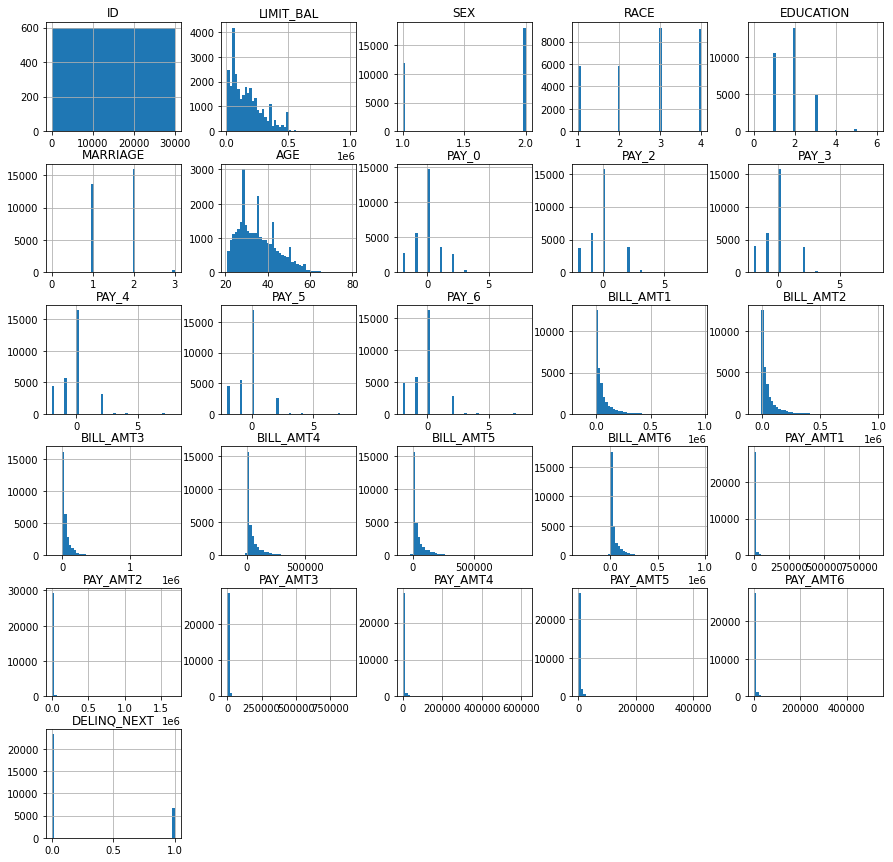

In [23]:
data[data.columns].hist(bins=50, figsize = (15,15)) #Histograms for each Column

In [26]:
#Pearson Correlation Matrix
corr = data.corr()
corr

,ID,LIMIT_BAL,SEX,RACE,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DELINQ_NEXT
ID,1.000000,0.026179,0.018497,-0.000710,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,-0.022199,-0.020270,0.019389,0.017982,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,0.044173,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.006149,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
RACE,-0.000710,0.044173,0.006149,1.000000,-0.012796,0.007010,0.001284,-0.102487,-0.082986,-0.074547,-0.072259,-0.067316,-0.054935,0.004232,0.002459,0.000543,0.000376,0.002096,0.002756,0.030069,0.012681,0.021854,0.026047,0.022148,0.020259,-0.303811
EDUCATION,0.039177,-0.219161,0.014232,-0.012796,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,0.007010,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.001284,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,-0.102487,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,-0.082986,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,-0.074547,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253


In [42]:
#Variables to be used in model
y_name = 'DELINQ_NEXT'
X_names = ['LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [43]:
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_names], data[y_name], test_size = 0.5, random_state = seed) #split training data
valid_X, test_X ,valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state = seed) #split remaining into test and validation

In [45]:
#Number of Rows and Columns in each dataset
print('Training data: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1]+1))
print('Validation data: %i rows and %i columns' % (valid_X.shape[0], valid_X.shape[1]+1))
print('Testing data: %i rows and %i columns' % (test_X.shape[0], test_X.shape[1]+1))

Training data: 15000 rows and 20 columns
Validation data: 7500 rows and 20 columns
Testing data: 7500 rows and 20 columns


In [49]:
#train decision tree with validation based early stopping
max_depth = 12
candidate_models = {}

#Find best model
for depth in range(0,max_depth):
  #Fit a model
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1)
  clf.fit(train_X, train_y)

  #Score training and validation data
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1]

  #AUC scores
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)

  #Cross validation scores
  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  #store results
  candidate_models[depth+1]= {}
  candidate_models[depth+1]['Model'] = clf
  candidate_models[depth+1]['Training AUC'] = train_auc
  candidate_models[depth+1]['Validation AUC'] = valid_auc
  candidate_models[depth+1]['5-Fold SD'] = cv_std





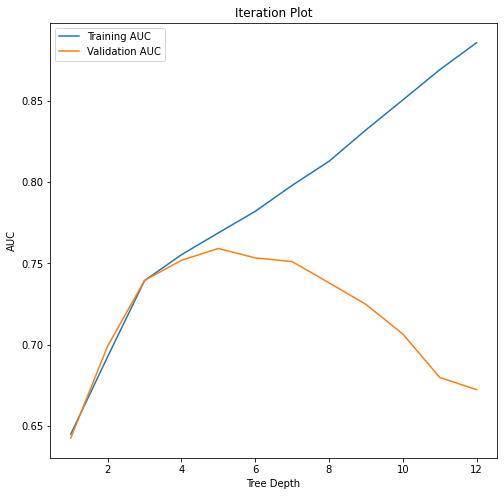

In [50]:
# Plot of Tree Depth vs. Training and Validation AUC 
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index') # turn Dict into Dataframe
fig, ax = plt.subplots(figsize = (8,8))
_ =candidate_results[['Training AUC', 'Validation AUC']].plot(title='Iteration Plot', ax=ax)
_ = ax.set_xlabel('Tree Depth') #X Axis
_ = ax.set_ylabel('AUC') # Y Axis

In [52]:
#Results in a Table
candidate_results.iloc[:, 1:]

,Training AUC,Validation AUC,5-Fold SD
1,0.645020,0.642652,0.009507
2,0.692647,0.699189,0.011302
3,0.739426,0.739535,0.008630
4,0.755363,0.751928,0.009457
5,0.768787,0.759209,0.008988
6,0.782033,0.753430,0.010628
7,0.797992,0.751175,0.015014
8,0.812814,0.738123,0.017281
9,0.832088,0.724842,0.015290
10,0.850514,0.706681,0.013640


In [54]:
#Plot of Decision Tree
best_model = candidate_models[5]['Model']
fig = plt.figure(figsize=(400,70))
_ = tree.plot_tree(best_model, 
                   feature_names = X_names,
                   class_names = ['On Time', 'Delinquent'],
                   filled = True)

In [57]:
#Score on Test Data
test_phat = best_model.predict_proba(test_X)[: ,1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7483


#Bias Testing


In [58]:
#function for Confusion Matrix
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):

    #Determine levels of y variable
    #sort for consistency
    level_list = list(frame[y].unique())
    level_list.sort(reverse=True)
    #init confusion matrix
    cm_frame = pd.DataFrame(columns=['actual: ' +  str(i) for i in level_list],
                            index=['predicted: ' + str(i) for i in level_list])

    frame_ = frame.copy(deep=True)
    #convert numeric predictions to binary decisions using a cutoff
    dname = 'd_' + str(y)
    frame_[dname] = np.where(frame_[yhat] > cutoff , 1, 0)
    #slice frame
    if (by is not None) & (level is not None):
        frame_ = frame_[frame[by] == level]
    #calculate size of each confusion matrix value
    for i, lev_i in enumerate(level_list):
        for j, lev_j in enumerate(level_list):
            cm_frame.iat[j, i] = frame_[(frame_[y] == lev_i) & (frame_[dname] == lev_j)].shape[0]
    #output results
    if verbose:
        if by is None:
            print('Confusion matrix:')
        else:
            print('Confusion matrix by ' + by + '=' + str(level))

    return cm_frame


In [64]:
#funtion for AIR
def air(cm_dict, reference_key, protected_key, verbose=True):

    eps = 1e-20 #numeric stability and divide by 0 protection

    #reference group summary
    reference_accepted = float(cm_dict[reference_key].iat[1,0] + cm_dict[reference_key].iat[1,1])
    reference_total = float(cm_dict[reference_key].sum().sum())
    reference_prop = reference_accepted/reference_total
    if verbose:
        print(reference_key.title() + ' proportion accepted: %.3f' % reference_prop)

    #protected group summary
    protected_accepted = float(cm_dict[protected_key].iat[1,0] + cm_dict[protected_key].iat[1,1]) 
    protected_total = float(cm_dict[protected_key].sum().sum())
    protected_prop = protected_accepted/protected_total
    if verbose:
        print(protected_key.title() + ' proportion accepted: %.3f' % protected_prop)
    #return adverse impact ratio 
    return ((protected_prop + eps)/(reference_prop + eps))


In [59]:
#add probabilities onto validation set
valid_yhat = pd.DataFrame(valid_X, columns=X_names)
valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
valid_yhat['SEX'] = data.loc[valid_yhat.index, 'SEX']
valid_yhat[y_name]  = valid_y
valid_yhat['phat'] = best_model.predict_proba(valid_X)[:, 1]
valid_yhat.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RACE,SEX,DELINQ_NEXT,phat
13130,80000,-1,-1,-1,-1,-1,-1,2741,9266,1125,4380,2210,1150,9266,1125,4401,2210,1150,390,3.0,2,0,0.186151
11022,100000,-1,-1,-1,0,-1,-1,2494,1999,6632,6150,10122,2689,2005,6633,18,10152,2697,3607,3.0,1,0,0.085704
16364,230000,-1,-1,-1,-1,0,-1,3128,10998,1509,1390,1072,849,10998,1509,1390,0,849,3720,2.0,2,0,0.085704
18305,20000,0,0,0,0,0,0,16931,17644,18679,18275,7953,8323,1300,1340,1207,300,500,500,3.0,2,0,0.186151
26513,280000,-2,-2,-2,-2,-2,-2,-200,-200,-200,-200,-200,-200,0,0,0,0,0,200,1.0,2,1,0.330163


In [65]:
#calculate confusion matrices across different racial groups

race_dict = {'hispanic': 1,
             'black': 2,
             'white': 3,
             'asian': 4}

race_group_names = list(race_dict.keys())
race_cm_dict = {}
#confusion matrix cutoff is 0.15
for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.15)
    print(race_cm_dict[name])
    print('(%s)' % name.title())
    print()
#calculates AIR
for name in race_group_names:
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()

Confusion matrix by RACE=1
             actual: 1 actual: 0
predicted: 1       474       344
predicted: 0       144       488
(Hispanic)

Confusion matrix by RACE=2
             actual: 1 actual: 0
predicted: 1       423       364
predicted: 0       127       557
(Black)

Confusion matrix by RACE=3
             actual: 1 actual: 0
predicted: 1       186       827
predicted: 0        61      1224
(White)

Confusion matrix by RACE=4
             actual: 1 actual: 0
predicted: 1       174       812
predicted: 0        57      1238
(Asian)

White proportion accepted: 0.559
Hispanic proportion accepted: 0.436
hispanic-to-white AIR: 0.78

White proportion accepted: 0.559
Black proportion accepted: 0.465
black-to-white AIR: 0.83

White proportion accepted: 0.559
Asian proportion accepted: 0.568
asian-to-white AIR: 1.02



Hispanic to White AIR is Problematic

In [66]:
#calculate confusion matrices across male and females
sex_dict = {'male': 1,
            'female': 2}

sex_group_names = list(sex_dict.keys())
sex_cm_dict = {}
#confusion matrix cutoff is 0.15
for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.15)
    print(sex_cm_dict[name])
    print('(%s)' % name.title())
    print()
#calculates AIR
for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()

Confusion matrix by SEX=1
             actual: 1 actual: 0
predicted: 1       551       972
predicted: 0       178      1299
(Male)

Confusion matrix by SEX=2
             actual: 1 actual: 0
predicted: 1       706      1375
predicted: 0       211      2208
(Female)

Male proportion accepted: 0.492
Female proportion accepted: 0.538
female-to-male AIR: 1.09



# Remediation

In [72]:
#Calculates different accuracy at different cutoffs
def get_acc(frame, cutoff, y_name, yhat_name):

  temp = frame.copy(deep=True) 
  temp['decision'] = np.where(temp[yhat_name] > cutoff , 1, 0)
  acc = accuracy_score(temp[y_name], temp['decision'])
  del temp
  return acc

In [73]:
for cutoff in np.arange(0.1,0.31, 0.01):
  print('Accuracy at cutoff %.2f is: %.4f' % (np.round(cutoff,2),
                                             get_acc(valid_yhat, np.round(cutoff,2),y_name,'phat')))

Accuracy at cutoff 0.10 is: 0.5605
Accuracy at cutoff 0.11 is: 0.5605
Accuracy at cutoff 0.12 is: 0.5628
Accuracy at cutoff 0.13 is: 0.5628
Accuracy at cutoff 0.14 is: 0.5628
Accuracy at cutoff 0.15 is: 0.6352
Accuracy at cutoff 0.16 is: 0.6352
Accuracy at cutoff 0.17 is: 0.6352
Accuracy at cutoff 0.18 is: 0.6352
Accuracy at cutoff 0.19 is: 0.7380
Accuracy at cutoff 0.20 is: 0.7379
Accuracy at cutoff 0.21 is: 0.7776
Accuracy at cutoff 0.22 is: 0.7776
Accuracy at cutoff 0.23 is: 0.7776
Accuracy at cutoff 0.24 is: 0.7889
Accuracy at cutoff 0.25 is: 0.7889
Accuracy at cutoff 0.26 is: 0.7889
Accuracy at cutoff 0.27 is: 0.7889
Accuracy at cutoff 0.28 is: 0.7889
Accuracy at cutoff 0.29 is: 0.7889
Accuracy at cutoff 0.30 is: 0.7889


In [75]:
#recalculate AIR and confusion matrices at a cutoff of 0.19
#Race Confusion Matrices
for name in race_group_names:
    race_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=race_dict[name], cutoff=0.19, verbose=False)
#Race AIR
for name in race_group_names:
   if name != 'white':
      print('%s-to-%s AIR: %.2f' % (name, 'white', air(race_cm_dict, 'white', name)))
      print()
#Sex Confusion Matrices
for name in sex_group_names:
    sex_cm_dict[name] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='SEX', level=sex_dict[name], cutoff=0.19, verbose=False)
#Sex AIR
for name in sex_group_names:
   if name != 'male':
      print('%s-to-%s AIR: %.2f' % (name, 'male', air(sex_cm_dict, 'male', name)))
      print()


White proportion accepted: 0.725
Hispanic proportion accepted: 0.584
hispanic-to-white AIR: 0.81

White proportion accepted: 0.725
Black proportion accepted: 0.619
black-to-white AIR: 0.85

White proportion accepted: 0.725
Asian proportion accepted: 0.740
asian-to-white AIR: 1.02

Male proportion accepted: 0.664
Female proportion accepted: 0.693
female-to-male AIR: 1.04



In [77]:
#Redo Model search with cutoff at 0.19
max_depth = 12
candidate_models = {}

for depth in range(0, max_depth):
  #Fit Models
  clf = tree.DecisionTreeClassifier(max_depth = depth + 1, random_state=seed)
  clf.fit(train_X, train_y)
  #Score Training and Validation data
  train_phat = clf.predict_proba(train_X)[:, 1]
  valid_phat = clf.predict_proba(valid_X)[:, 1]
  #Calculate AUC
  train_auc = roc_auc_score(train_y, train_phat)
  valid_auc = roc_auc_score(valid_y, valid_phat)
  #Calculate AIR
  valid_yhat = pd.DataFrame(valid_X, columns=X_names)
  valid_yhat['RACE'] = data.loc[valid_yhat.index, 'RACE']
  valid_yhat[y_name] = valid_y
  valid_yhat['phat'] = valid_phat
  cm_dict = {}
  cm_dict['white'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=3, cutoff=0.19, verbose=False)
  cm_dict['hispanic'] = get_confusion_matrix(valid_yhat, y_name, 'phat', by='RACE', level=1, cutoff=0.19, verbose=False)
  valid_hispanic_air = air(cm_dict, 'white', 'hispanic', verbose=False)

  cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5)
  cv_std = np.std(cv_scores)

  #Store Results
  candidate_models[depth + 1] = {}
  candidate_models[depth + 1]['Model'] = clf
  candidate_models[depth + 1]['Training AUC'] = train_auc
  candidate_models[depth + 1]['Validation AUC'] = valid_auc
  candidate_models[depth + 1]['5-Fold SD'] = cv_std
  candidate_models[depth + 1]['Hispanic-to-White AIR'] = valid_hispanic_air


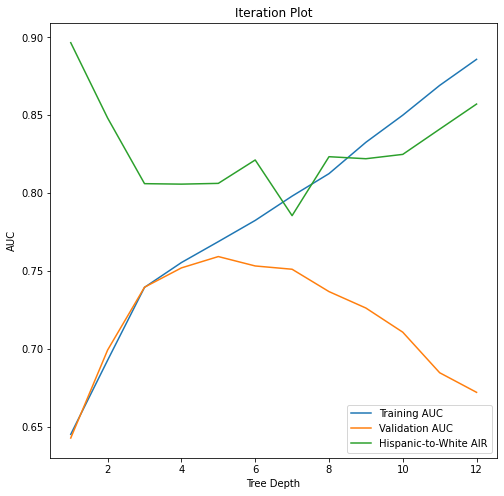

In [79]:
#Plots tree depth vs Training and Validation AUC and Hispanic to White AIR
candidate_results = pd.DataFrame.from_dict(candidate_models, orient='index')
fig, ax = plt.subplots(figsize=(8, 8))
_ = candidate_results[['Training AUC', 'Validation AUC','Hispanic-to-White AIR']].plot(title='Iteration Plot',
                                                               ax=ax)
_ = ax.set_xlabel('Tree Depth')
_ = ax.set_ylabel('AUC')



In [82]:
#AUC and AIR values with new cutoff of 0.19
print(candidate_results.iloc[:, 1:])
#Test AUC for model with depth 6
best_model_2 = candidate_models[6]['Model']
test_phat = best_model_2.predict_proba(test_X)[: ,1]
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

    Training AUC  Validation AUC  5-Fold SD  Hispanic-to-White AIR
1       0.645020        0.642652   0.009507               0.896581
2       0.692647        0.699189   0.011302               0.848184
3       0.739426        0.739535   0.007600               0.806033
4       0.755363        0.751928   0.009457               0.805732
5       0.768787        0.759209   0.009143               0.806216
6       0.782422        0.753174   0.009830               0.821245
7       0.798028        0.751064   0.017269               0.785486
8       0.812469        0.736711   0.018701               0.823349
9       0.832598        0.726149   0.016318               0.822050
10      0.850023        0.710632   0.013985               0.824840
11      0.869141        0.684593   0.016667               0.841046
12      0.885886        0.672006   0.013557               0.857167
Test AUC: 0.7487


A Depth of 6 is the best choice for our Final Model


*   **Training AUC**: 0.782
*   **Validation AUC**: 0.753
*   **Test AUC**: 0.748
*   **Asian-White AIR**: 1.02
*  **Black-White AIR**: 0.85
* **Female-Male AIR**: 1.04
* **Hipanic-White AIR**: 0.82









